In [2]:
import pandas as pd
df_train_data = pd.read_csv('train_data.csv', index_col=0)
df_valid_data = pd.read_csv('valid_data.csv', index_col=0)

In [3]:
df_train_data['2'].shape

(560,)

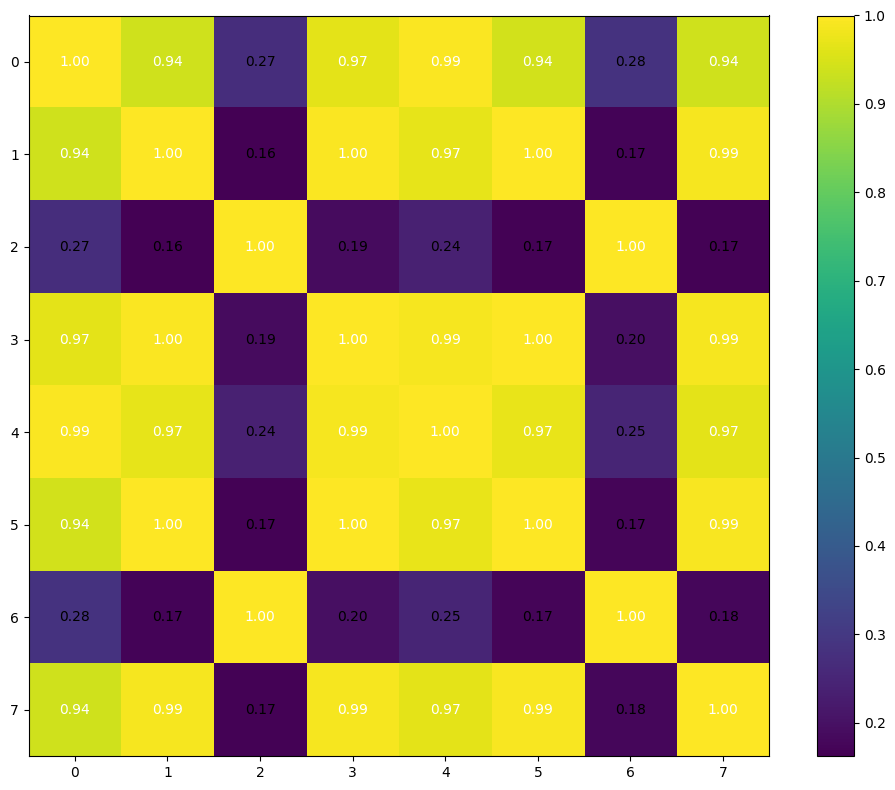

In [4]:
from mlxtend.plotting import heatmap
from matplotlib import pyplot as plt
import numpy as np
cm = np.corrcoef(df_train_data.values.T)
hm = heatmap(cm,
             figsize=(10,8))
plt.tight_layout()

In [5]:
train_X, train_y = df_train_data.drop('7', axis=1).values, df_train_data['7'].values
valid_X, valid_y = df_valid_data.drop('7', axis=1).values, df_valid_data['7'].values

In [6]:
low_cor_train_X = train_X[:, [2, 5]]
low_cor_valid_X = valid_X[:, [2, 5]]

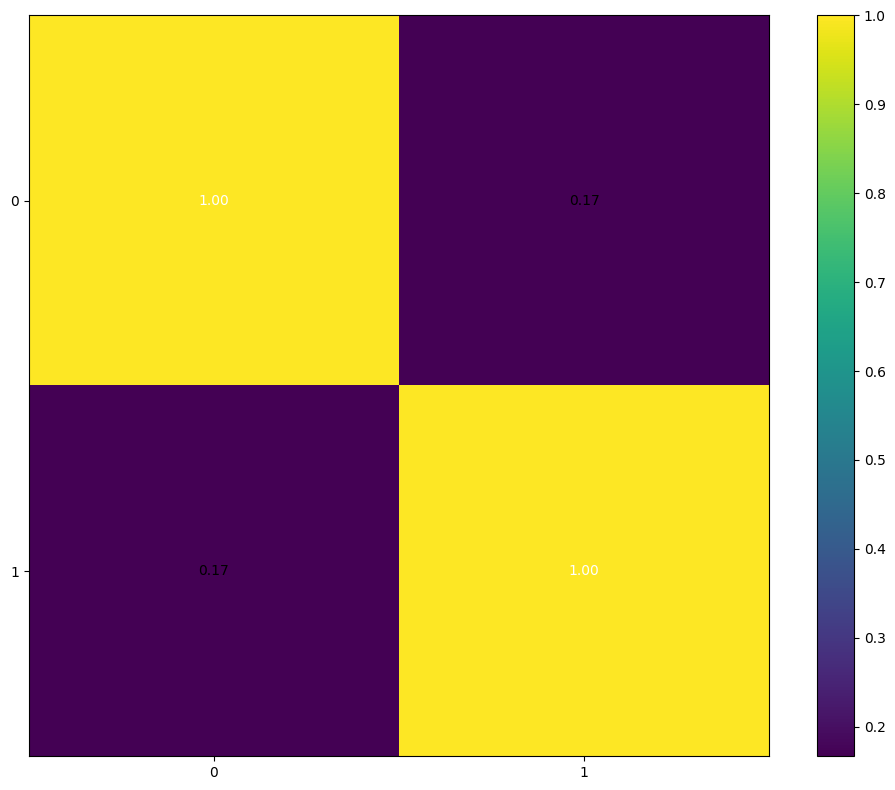

In [7]:
cm = np.corrcoef(low_cor_train_X.T)
hm = heatmap(cm,
             figsize=(10,8))
plt.tight_layout()

In [8]:
first_part_of_train_X = low_cor_train_X[:,1].reshape(-1, 1)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model_1 = LinearRegression()
model_1.fit(first_part_of_train_X, train_y)
mean_squared_error(model_1.predict(first_part_of_train_X), train_y)

0.09285711313369936

In [9]:
first_part_of_valid_X = low_cor_valid_X[:,1].reshape(-1, 1)
mean_squared_error(model_1.predict(first_part_of_valid_X), valid_y)

0.0864296542610869

In [10]:
second_part_of_train_X = low_cor_train_X[:,0].reshape(-1, 1)
second_part_of_valid_X = low_cor_valid_X[:,0].reshape(-1, 1)

In [11]:
second_part_of_valid_X.dtype

dtype('float64')

In [12]:
ejections_of_train = []
for i, a in enumerate(second_part_of_train_X.flatten()):
    if a != -0.5686304806687642:
        ejections_of_train.append(i)


In [19]:
len(ejections_of_train) / second_part_of_train_X.shape[0]

0.07857142857142857

In [14]:
new_train_y = train_y - model_1.predict(first_part_of_train_X)
new_valid_y = valid_y - model_1.predict(first_part_of_valid_X)

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
model_2 = GradientBoostingRegressor()
model_2.fit(second_part_of_train_X, new_train_y)
mean_squared_error(model_2.predict(second_part_of_train_X), new_train_y)

0.09285711313369936

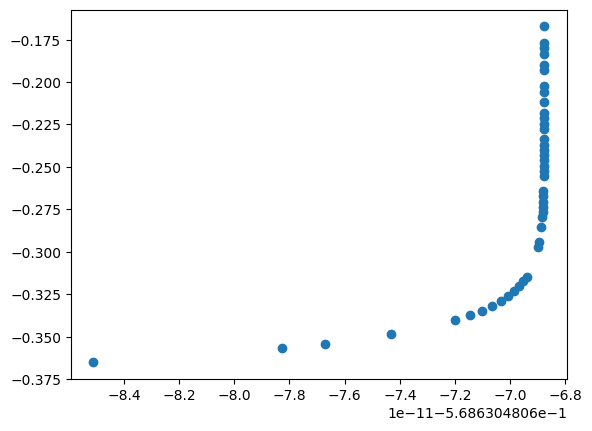

In [16]:
plt.scatter(second_part_of_train_X[ejections_of_train], first_part_of_train_X[ejections_of_train])

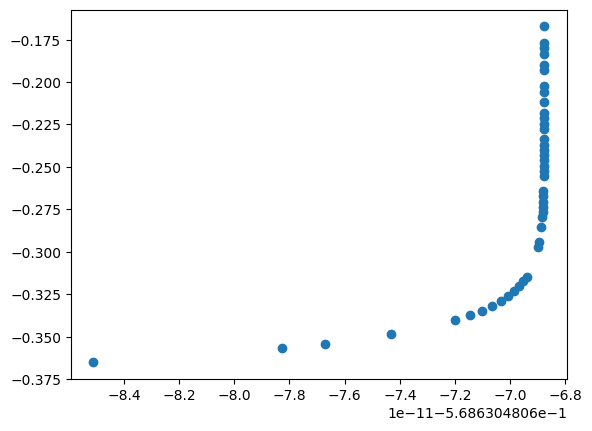

In [45]:
x = np.array(second_part_of_train_X[ejections_of_train])
y = np.array(first_part_of_train_X[ejections_of_train])
plt.scatter(x, y)

C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_7256\3169003533.py:3: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.exp(x), np.log(y))


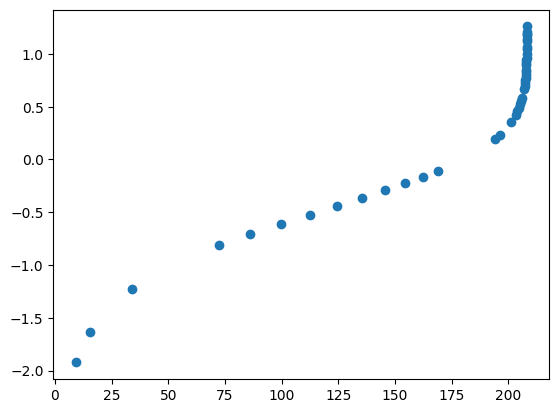

In [66]:
x -= x.min()
y -= y.min()
plt.scatter(np.exp(x), np.log(y))

KeyboardInterrupt: 

In [56]:
np.log10(y)

C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_7256\4048949146.py:1: RuntimeWarning: divide by zero encountered in log10
  np.log10(y)


array([[ 0.3146827 ],
       [-0.30706214],
       [ 0.38890776],
       [ 0.2128135 ],
       [ 0.49453714],
       [ 0.29118441],
       [ 0.510126  ],
       [ 0.5177398 ],
       [-0.8350097 ],
       [-0.15812647],
       [ 0.08271519],
       [       -inf],
       [ 0.32601317],
       [ 0.36883995],
       [ 0.33708235],
       [ 0.40817767],
       [ 0.41753345],
       [-0.09875372],
       [-0.04623528],
       [ 0.486554  ],
       [-0.70933424],
       [-0.19100724],
       [ 0.15226787],
       [ 0.24040038],
       [ 0.35848477],
       [-0.07173998],
       [ 0.10110045],
       [ 0.19839157],
       [ 0.46179662],
       [ 0.30307782],
       [ 0.52523826],
       [ 0.45325869],
       [-0.26496168],
       [ 0.34790243],
       [-0.35353139],
       [-0.22646928],
       [ 0.25361386],
       [ 0.18351432],
       [ 0.43572268],
       [ 0.39863832],
       [-0.12747096],
       [-0.53178235],
       [ 0.22680798],
       [ 0.54707656]])